## **Análisis y recopilación de Noticias Falsas**

En este Notebook vamos a estar analizando y recopilando información noticias falsas en español. En primer lugar, se hara un estudio de distintos datasets encontrados en la nube.Luego vamos a analizar una gran variedad de datos obtenidos de paginas de fact-checking mediante la tecnica de web scrapping. Finalmente se busca unificar toda la informacion para contar con un corpus robusto de noticias falsas en español.

A modo de estandarizar la informacion, se cambiara las labels de la siguiente manera en caso de que corresponda:

* True : 1
* False : 0

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode

##  **1. Análisis Dataset final**


##### **Cantidad de valores totales:**

In [5]:
data = pd.read_csv("data.csv")
data.shape

(62972, 9)

##### **Cantidad de nulos por columna:**

In [6]:
data.isnull().sum()

Categoria        0
Titulo        3168
Texto            0
Fecha         5741
Origen           0
id           61429
Topico       61429
Fuente       61436
URL          61432
dtype: int64

In [7]:
tf_count = data["Categoria"].value_counts()
tf_count

Categoria
1    36267
0    26705
Name: count, dtype: int64

##### **Cantidad de noticias Falsas y Verdaderas**

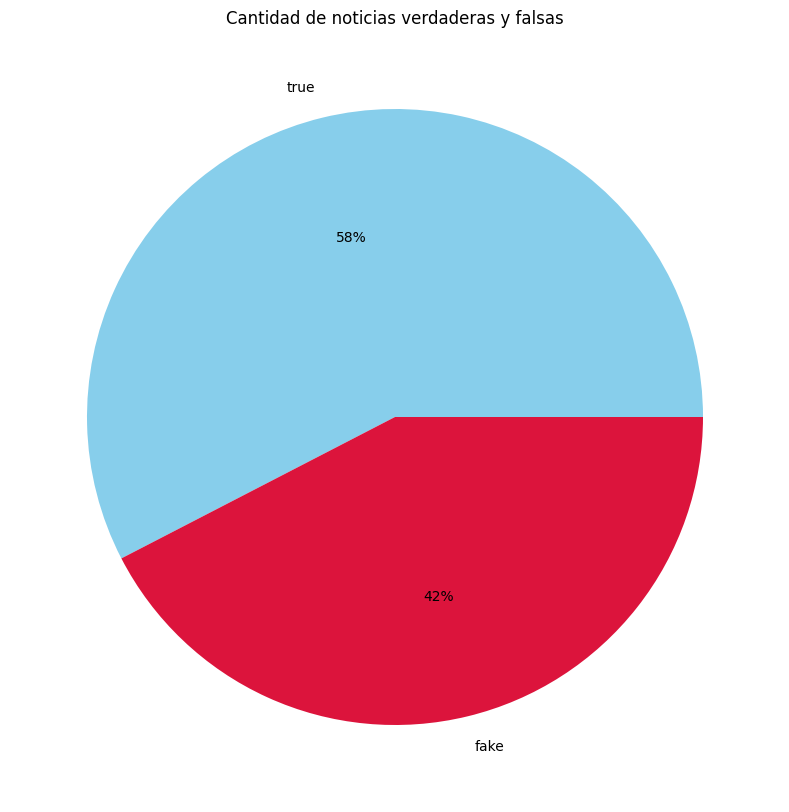

In [8]:
plt.figure(figsize=(15,10))
plt.pie(tf_count, labels=["true", "fake"],autopct="%1.f%%", colors=["skyblue", "crimson"])

plt.title("Cantidad de noticias verdaderas y falsas")

plt.show()

##### **Cantidad de noticias Falsas y Verdaderas por Origen**

In [9]:
count_per_origen_categoria = data.groupby(['Origen', 'Categoria']).size().reset_index(name='Count').sort_values(by="Count")
count_per_origen_categoria

,Origen,Categoria,Count
2,Madrid,0,259
3,Madrid,1,339
4,Posadas,0,766
5,Posadas,1,777
0,Kaggle,0,1800
1,Kaggle,1,1800
6,Vigo,0,23880
7,Vigo,1,33351


<Figure size 1200x600 with 0 Axes>

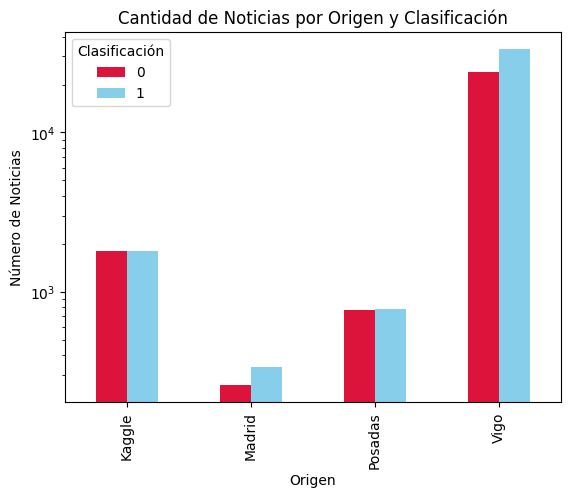

In [10]:
# Graficar la cantidad de noticias por año y clasificación
colores = {1: 'skyblue', 0: 'crimson'}
plt.figure(figsize=(12, 6))
data.groupby(['Origen', 'Categoria']).size().unstack().plot(kind='bar', stacked=False, color=[colores[c] for c in count_per_origen_categoria['Categoria']])
plt.title('Cantidad de Noticias por Origen y Clasificación')
plt.xlabel('Origen')
plt.ylabel('Número de Noticias')
plt.yscale('log')
plt.legend(title='Clasificación')
plt.show()

##### **Cantidad de noticias por fuente**

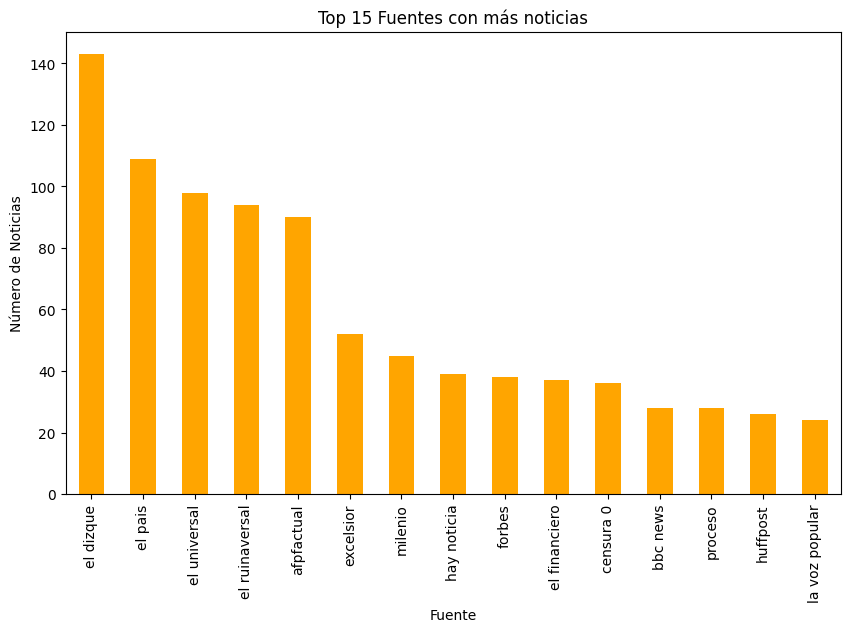

In [11]:
data['Fuente_Normalizada'] = data['Fuente'].apply(lambda x: unidecode(str(x).lower()) if not pd.isna(x) else pd.NA)

plt.figure(figsize=(10, 6))  # Ajusta el tamaño según sea necesario
data.groupby('Fuente_Normalizada').size().sort_values(ascending=False).head(15).plot(kind='bar', color='orange',)
plt.title('Top 15 Fuentes con más noticias')
plt.ylabel('Número de Noticias')
plt.xlabel('Fuente')
plt.show()

##### **Top fuentes con más noticias falsas**

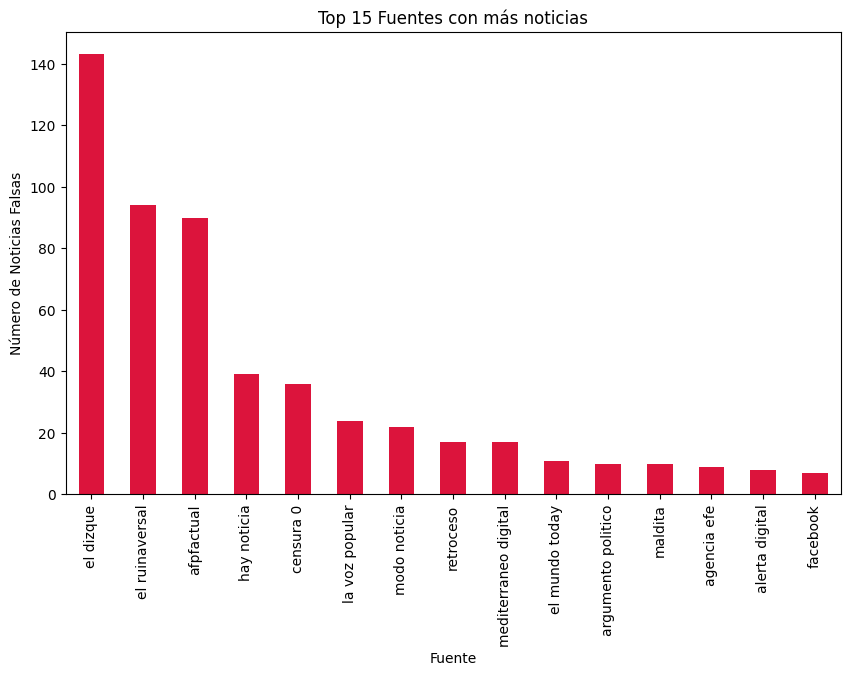

In [12]:
data_categoria_0 = data[data['Categoria'] == 0]
plt.figure(figsize=(10, 6))  # Ajusta el tamaño según sea necesario
data_categoria_0.groupby('Fuente_Normalizada').size().sort_values(ascending=False).head(15).plot(kind='bar', color='crimson',)
plt.title('Top 15 Fuentes con más noticias')
plt.ylabel('Número de Noticias Falsas')
plt.xlabel('Fuente')
plt.show()

##### **Top fuentes con más noticias verdaderas**

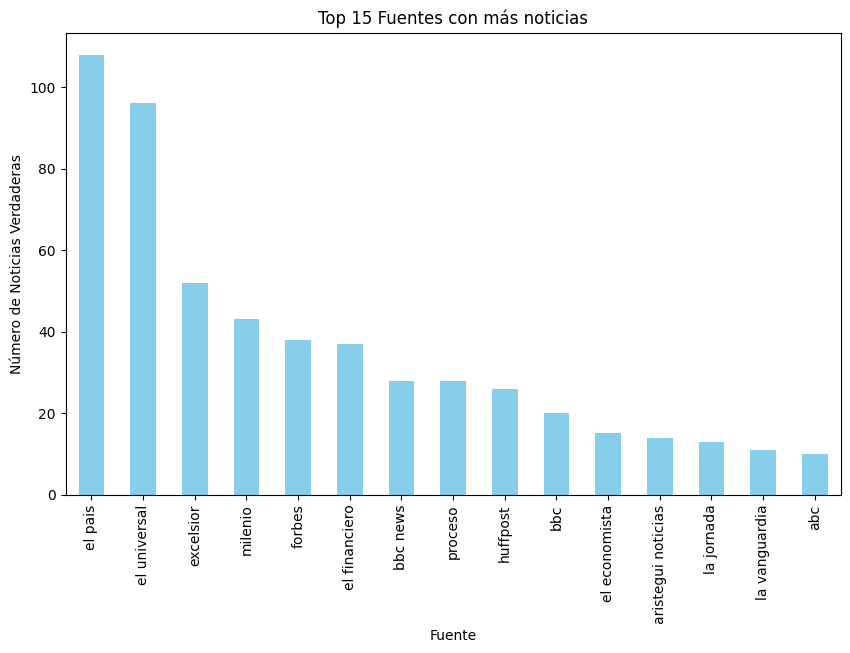

In [13]:
data_categoria_1 = data[data['Categoria'] == 1]
plt.figure(figsize=(10, 6))  # Ajusta el tamaño según sea necesario
data_categoria_1.groupby('Fuente_Normalizada').size().sort_values(ascending=False).head(15).plot(kind='bar', color='skyblue',)
plt.title('Top 15 Fuentes con más noticias')
plt.ylabel('Número de Noticias Verdaderas')
plt.xlabel('Fuente')
plt.show()

##### **Cantidad de noticias verdaderas y falsas por año**

In [14]:
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Obtener la fecha más antigua y la fecha más reciente
fecha_mas_antigua = data['Fecha'].min()
fecha_mas_reciente = data['Fecha'].max()

[fecha_mas_antigua, fecha_mas_reciente]

/var/folders/x_/90gbdtf13xq_0ggch_9jnn2w0000gn/T/ipykernel_4403/2607816148.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Fecha'] = pd.to_datetime(data['Fecha'])


[Timestamp('2017-04-24 00:00:00'), Timestamp('2023-12-28 00:00:00')]

<Figure size 1200x600 with 0 Axes>

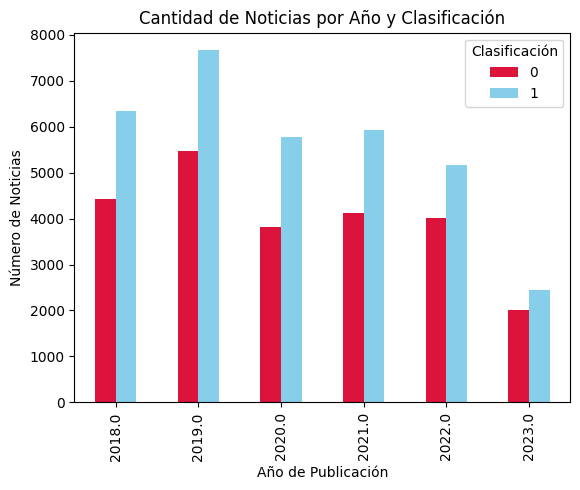

In [15]:
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Obtener el año de cada noticia
data['Anio'] = data['Fecha'].dt.year
data_for_graph = data[data['Anio'] != 2017]

colores = {1: 'skyblue', 0: 'crimson'}
# Graficar la cantidad de noticias por año y clasificación
plt.figure(figsize=(12, 6))
data_for_graph.groupby(['Anio', 'Categoria']).size().unstack().plot(kind='bar', stacked=False, color=colores)
plt.title('Cantidad de Noticias por Año y Clasificación')
plt.xlabel('Año de Publicación')
plt.ylabel('Número de Noticias')
plt.legend(title='Clasificación')
plt.show()

## **2. Preparación y limpieza de dataset final**

##### **Dropear columnas nulas**

In [16]:
data_procesada = data.drop(columns=["id", "Topico", "Fuente", "URL"])
data_procesada

,Categoria,Titulo,Texto,Fecha,Origen,Fuente_Normalizada,Anio
0,1,Moreno intenta apaciguar el flanco sanitario m...,El presidente abre la puerta a unos comicios e...,2022-04-19,Vigo,NaN,2022.0
1,1,La Abogacía del Estado se retira como acusació...,"En un escrito, la abogada del Estado Rosa Marí...",2021-09-17,Vigo,NaN,2021.0
2,0,Las promesas incumplidas de Pablo Echenique en...,Este lunes y martes la Asamblea de Madrid acog...,2022-09-12,Vigo,NaN,2022.0
3,1,Sánchez defiende 'resolver el problema' de la ...,Resulta evidente que la ley ha tenido algunos ...,2023-02-07,Vigo,NaN,2023.0
4,1,Ian Gibson cierra la lista electoral de la con...,"El hispanista, que ya ocupó un puesto simbólic...",2023-04-12,Vigo,NaN,2023.0
...,...,...,...,...,...,...,...
62967,0,Madonna será la nueva imagen del Chocolate Abu...,Madonna será la nueva imagen del Chocolate Abu...,NaT,Posadas,el dizque,NaN
62968,1,"Filtran material íntimo de Zelina Vega, luchad...","Filtran material íntimo de Zelina Vega, luchad...",NaT,Posadas,radio formula,NaN
62969,0,CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...,CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...,NaT,Posadas,la voz popular,NaN
62970,0,TV Azteca anuncia que cambiará su nombre por u...,TV Azteca anuncia que cambiará su nombre por u...,NaT,Posadas,el dizque,NaN


In [17]:
data_procesada['Noticia'] = data_procesada['Titulo'].fillna('').str.upper() + '\n' + data_procesada['Texto']
data_procesada

,Categoria,Titulo,Texto,Fecha,Origen,Fuente_Normalizada,Anio,Noticia
0,1,Moreno intenta apaciguar el flanco sanitario m...,El presidente abre la puerta a unos comicios e...,2022-04-19,Vigo,NaN,2022.0,MORENO INTENTA APACIGUAR EL FLANCO SANITARIO M...
1,1,La Abogacía del Estado se retira como acusació...,"En un escrito, la abogada del Estado Rosa Marí...",2021-09-17,Vigo,NaN,2021.0,LA ABOGACÍA DEL ESTADO SE RETIRA COMO ACUSACIÓ...
2,0,Las promesas incumplidas de Pablo Echenique en...,Este lunes y martes la Asamblea de Madrid acog...,2022-09-12,Vigo,NaN,2022.0,LAS PROMESAS INCUMPLIDAS DE PABLO ECHENIQUE EN...
3,1,Sánchez defiende 'resolver el problema' de la ...,Resulta evidente que la ley ha tenido algunos ...,2023-02-07,Vigo,NaN,2023.0,SÁNCHEZ DEFIENDE 'RESOLVER EL PROBLEMA' DE LA ...
4,1,Ian Gibson cierra la lista electoral de la con...,"El hispanista, que ya ocupó un puesto simbólic...",2023-04-12,Vigo,NaN,2023.0,IAN GIBSON CIERRA LA LISTA ELECTORAL DE LA CON...
...,...,...,...,...,...,...,...,...
62967,0,Madonna será la nueva imagen del Chocolate Abu...,Madonna será la nueva imagen del Chocolate Abu...,NaT,Posadas,el dizque,NaN,MADONNA SERÁ LA NUEVA IMAGEN DEL CHOCOLATE ABU...
62968,1,"Filtran material íntimo de Zelina Vega, luchad...","Filtran material íntimo de Zelina Vega, luchad...",NaT,Posadas,radio formula,NaN,"FILTRAN MATERIAL ÍNTIMO DE ZELINA VEGA, LUCHAD..."
62969,0,CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...,CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...,NaT,Posadas,la voz popular,NaN,CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...
62970,0,TV Azteca anuncia que cambiará su nombre por u...,TV Azteca anuncia que cambiará su nombre por u...,NaT,Posadas,el dizque,NaN,TV AZTECA ANUNCIA QUE CAMBIARÁ SU NOMBRE POR U...


### Modelo de Vectorización

In [18]:
import re
from stop_words import get_stop_words

In [19]:
stop_words_es = get_stop_words('es')
puntuaciones = "'.,;:\"()[]{}\\/?!-_*'"

def quitar_stop_words(texto):
    words = texto.split()
    result_words = [word for word in words if (word not in stop_words_es and word not in puntuaciones)]
    resultado = ' '.join(result_words)
    return resultado

def clean_comments(corpus):
    patt1 = re.compile('\d')
    patt2 = re.compile('\W')
    patt3 = re.compile('  *')

    corpus = corpus.lower()
    corpus = patt1.sub('', corpus)
    corpus = patt2.sub(' ', corpus)
    corpus = patt3.sub(' ', corpus)
    corpus = quitar_stop_words(corpus)
    return corpus

In [20]:
data_procesada['Texto_Limpio'] = data_procesada['Noticia'].apply(lambda x: clean_comments(x))

In [21]:
corpus = data_procesada['Texto_Limpio'].values
corpus[0]

'moreno intenta apaciguar flanco sanitario mientras enreda fecha elecciones presidente abre puerta comicios junio domingo'

In [22]:
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer()
tknzr.tokenize(corpus[0])

['moreno',
 'intenta',
 'apaciguar',
 'flanco',
 'sanitario',
 'mientras',
 'enreda',
 'fecha',
 'elecciones',
 'presidente',
 'abre',
 'puerta',
 'comicios',
 'junio',
 'domingo']

In [23]:
corpus_tk = []
for i in corpus:
    corpus_tk.append(tknzr.tokenize(i))

In [25]:
from gensim.models import Word2Vec
model = Word2Vec(corpus_tk, min_count=50, window=5, vector_size=100)
X = model.wv.vectors
X

array([[ 1.5483704 , -1.4640354 ,  0.5644442 , ...,  0.4026547 ,
        -0.50154406,  0.39566046],
       [ 1.2021531 , -1.7794317 , -0.46226448, ...,  1.4961089 ,
        -0.95180917,  0.39066255],
       [ 0.79730606, -1.1883916 , -1.3274182 , ..., -0.47765753,
         1.890035  ,  0.07524038],
       ...,
       [ 0.03042814,  0.11723759, -0.01634   , ..., -0.23681083,
        -0.13605331,  0.07539692],
       [-0.21045804,  0.00973973,  0.1375675 , ..., -0.26729015,
         0.22980231,  0.24470443],
       [-0.2686015 ,  0.29275402, -0.136346  , ..., -0.3739115 ,
        -0.2944338 , -0.3529124 ]], dtype=float32)

Text(0.5, 0, 'PCA Components')

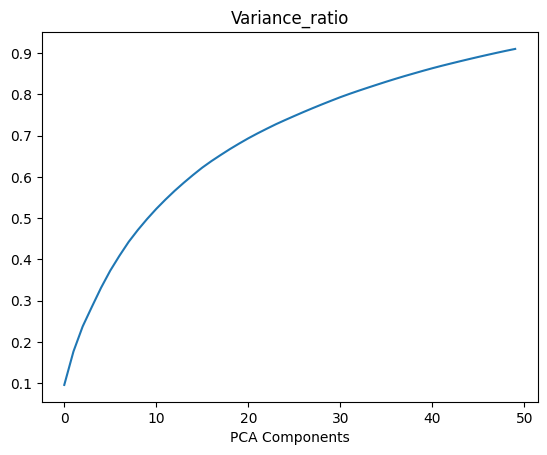

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, svd_solver='full')
pca.fit(X)
plt.plot((pca.explained_variance_ratio_).cumsum())
plt.title('Variance_ratio')
plt.xlabel('PCA Components')


In [27]:
pca = PCA(n_components=30, svd_solver='full')
pca.fit(X)

PCA(n_components=30, svd_solver='full')

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=30)
TF_IDF = vectorizer.fit_transform(corpus)

In [29]:
TF_IDF.toarray().shape

(62972, 8235)

In [30]:
tf_idf = vectorizer.vocabulary_

In [ ]:
tf_idf

{'moreno': 5084,
 'intenta': 4245,
 'sanitario': 7049,
 'mientras': 4979,
 'fecha': 3384,
 'elecciones': 2751,
 'presidente': 6058,
 'abre': 34,
 'puerta': 6343,
 'comicios': 1510,
 'junio': 4433,
 'domingo': 2636,
 'abogacía': 20,
 'retira': 6828,
 'acusación': 173,
 'pieza': 5820,
 'iberdrola': 3917,
 'caso': 1215,
 'tándem': 7760,
 'escrito': 3005,
 'abogada': 21,
 'rosa': 6940,
 'maría': 4857,
 'argumenta': 632,
 'decisión': 2178,
 'falta': 3357,
 'activa': 126,
 'respecto': 6787,
 'delitos': 2249,
 'imputados': 4013,
 'promesas': 6214,
 'pablo': 5504,
 'echenique': 2686,
 'sanidad': 7046,
 'educación': 2708,
 'vivienda': 8079,
 'lunes': 4710,
 'martes': 4852,
 'asamblea': 673,
 'madrid': 4732,
 'acogerá': 102,
 'debate': 2141,
 'región': 6653,
 'último': 8227,
 'celebró': 1281,
 'hace': 3784,
 'dos': 2646,
 'años': 850,
 'septiembre': 7140,
 'sánchez': 7441,
 'defiende': 2216,
 'resolver': 6775,
 'problema': 6153,
 'ley': 4563,
 'solo': 7287,
 'diálogo': 2618,
 'resulta': 6818,
 '

In [31]:
import numpy as np

X = np.zeros((data_procesada.shape[0], 30))
for i,corp in enumerate(corpus):
    vect = np.zeros(100)
    for num,word in enumerate(corp.split(' ')):
        try:
            vect += model[word]*TF_IDF[i,tf_idf[word]]
        except:
            pass
    if num != 0:
        vect = vect/num
    else:
        vect = vect * 0
    vect = vect.reshape(1,100)
    vect_pca = pca.transform(vect)
    X[i,:]=vect_pca

In [32]:
Y = data_procesada['Categoria'].values

tt = int(0.9 * len(X))
X_train, X_test = X[:tt], X[tt:]
y_train, y_test = Y[:tt], Y[tt:]

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:981: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(self.var_), copy=False, constant_mask=constant_mask


In [ ]:
from sklearn import svm

best_kernel = 0
best_degree = 0
best_gamma = 0
best_C = 0
best_accuracy = 0

kernels = ['rbf', 'sigmoid', 'poly']
degrees = [1, 2, 3, 4, 5]
gammas = [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0]
values_of_C = [1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1, 1.0, 1.0e+1, 1.0e+2, 1.0e+3]
coef0 = 1.0

print("Probando hiperparametros")
for kernel in kernels:
    if kernel == 'poly':
        _degrees = degrees
    else:
        _degrees = [1]
    for degree in degrees:
        for gamma in gammas:
            for C in values_of_C:
                classifier = svm.SVC(kernel=kernel, degree=degree, gamma=gamma, coef0=coef0, C=C, max_iter=100)
                classifier.fit(X_train, y_train)
                y_pred = classifier.predict(X_test)

                accuracy = (100 * (y_test == y_pred).sum()) / (len(y_test))

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_kernel = kernel
                    best_gamma = gamma
                    best_C = C
                    best_degree = degree
                print(" %-7s degree %3d gamma %.6f C %e accuracy %.1f%%" % (kernel, degree, gamma, C, accuracy))
print("La mejor combinación es: %-7s degree %3d gamma %.6f C %e accuracy %.1f%%" % (best_kernel, best_degree, best_gamma, best_C, best_accuracy))

### Modelo de Redes Neuronales

In [34]:
x_train, x_test = X_train.reshape(X_train.shape[0], 1, X_train.shape[1]), X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
y = np.eye(2)[Y]
Y_train, Y_test = y[:tt], y[tt:]

In [35]:
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Reshape, Flatten, Activation
from keras.layers import Dropout, BatchNormalization, GaussianNoise
from keras.layers import Dense, LSTM
from keras.constraints import max_norm
from keras.optimizers import RMSprop, SGD, Adadelta, Adagrad, Adam


In [40]:
_tensor_ = input_tensor = Input(shape=(1, x_train.shape[2]), name='main_input')

_tensor_ = LSTM(51, activation='relu', kernel_constraint=max_norm(3.0), return_sequences=True)(_tensor_)

_tensor_ = Flatten()(_tensor_)

_tensor_ = Dense(500, activation='relu', kernel_constraint=max_norm(3.0))(_tensor_)
_tensor_ = Dense(500, activation='relu', kernel_constraint=max_norm(3.0))(_tensor_)
_tensor_ = Dense(100, activation='relu', kernel_constraint=max_norm(3.0))(_tensor_)

output_tensor = Dense(2, activation='sigmoid', kernel_constraint=max_norm(3.0))(_tensor_)

model = Model(input_tensor, output_tensor)
model.compile(loss='mse', optimizer=Adagrad())
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ main_input (InputLayer)         │ (None, 1, 30)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 51)             │     16,728 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 51)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 500)               │     26,000 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 500)               │    250,500 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 100)               │     50,100 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 2)                 │        202 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 343,530 (1.31 MB)

 Trainable params: 343,530 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.fit(x_train, Y_train, batch_size=100, epochs=300, shuffle=True, verbose=1)

Epoch 1/300
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2492
Epoch 2/300
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2469
Epoch 3/300
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2458
Epoch 4/300
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2448
Epoch 5/300
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2442
Epoch 6/300
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2436
Epoch 7/300
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2434
Epoch 8/300
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2428
Epoch 9/300
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2439
Epoch 10/300
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2434
Epoch 11/300
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2431
Epoch 12/300
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2435
Epoch 13/300
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2429
Epoch 14/300
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2430
Epoch 15/300
567/567 ━━━━━━━━━━━━━━━━━━━━ 1

In [70]:
y_pred = np.zeros(y_test.shape[0])
for i,case in enumerate(model.predict(x_test)):
    y_pred[i] = case.argmax()

197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step


In [71]:
accuracy = (100.0 * (y_test == y_pred).sum()) / len(Y_test)

In [72]:
accuracy

51.68307399174341